# <center>Flare<sup>TM</sup> Python Cookbook</center>

## Table of Contents
### [1. Introduction](#Introduction)

### [2. Getting started](#Getting-started)

### [3. Proteins](#Proteins)

### [4. Ligands](#Ligands)

### [5. Docking](#Docking)

## Introduction
* [Create the Working Directory (WD)](#Create-the-Working-Directory-(WD))
* [Create Input and Output Directories](#Create-Input-and-Output-Directories)

This document provides [Flare](https://www.cresset-group.com/software/flare/) users with Python 
code examples to use with the [Flare Python API](https://www.cresset-group.com/software/desktop/flare/flare-python/) 
and pyflare. The Flare Python API allows Flare functionality to be accessed from Python, and also 
enables you to add functionality to Flare’s graphical user interface (GUI). Each recipe or 
snippet in the [Flare Python Cookbook](https://www.cresset-group.com/support/support-resources/flare-python-cookbook) 
performs a specific task and it is intended to work with no user editing, 
but is equally intended to serve as a starting point for users who wish to develop their own 
snippets or combine recipes to build their own workflows.

Snippets can run directly from this Jupyter Notebook uploaded in the Flare Python Notebook window 
within the Flare GUI. Individual snippets can also run by pasting them into the Flare Python Interpreter 
window within the Flare GUI. Where input data is expected to be read in a particular format, this is indicated in the snippet. 
Examples of specific data formats used by some snippets are given in the 'FORMATEXAMPLE' folder. 
Each snippet has an identifier with the CressetFlareCB_*number* format, e.g. CressetFlareCB_18. The snippet identifier 
is only a tracker of Cookbook entries. 

Contact us at support@cresset-group.com if you need a new snippet or recipe.

### Creating the working environment

To familiarize with the snippets in this Cookbook, we recommend new users to run them 
from within an open Flare GUI. However, confident users may wish to run the snippets on an unopened *myflareproject.flr* file, 
which should be located, or it would be created after running the snippet, within the Cookbook Working Directory (WD), see below. 

#### Create the Working Directory (WD)

Create a directory named **Cookbook**, inside the default Documents/Flare directory for your OS:
    
    Windows: C:\Users\<USER>\Documents\Flare
    
    Linux: ~/Documents/Flare
    
    macOS: ~/Documents/Flare
    
    E.g. C:\Users\Foobar\Documents\Flare\Cookbook on Windows. 
    
   **This is the Cookbook WD.**

#### Create Input and Output Directories

Create two **sub-directories** named **INPUT** and **OUTPUT**, inside the Cookbook WD. These will 
be used by all snippets, therefore it is important to create these directories prior 
to using the Flare Python Cookbook. 

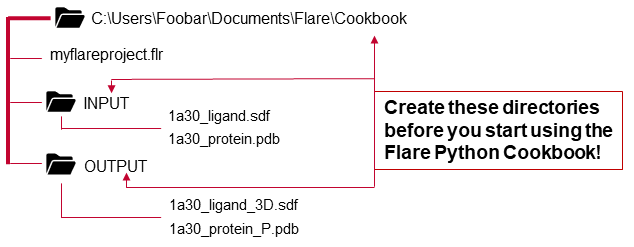

Confident users may want to create their own '# Setup' section, where the standard working 
directory paths may be changed, though we do not recommend this for users who are new to Python or 
the Flare Python API.

**NOTE:**

Cresset provides this additional Code on an “AS IS” and “AS AVAILABLE” basis without warranty of any kind. 

Copyright (C) 2023 Cresset Biomolecular Discovery Ltd.

Released under CC-BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/).

## Getting started

  * [Reading in example ligands and proteins](#Reading-in-example-ligands-and-proteins)
  * [Detect and move input data files](#Detect-and-move-input-data-files)
  * [Rapid split of large multi-molecule SDF file](#Rapid-split-of-large-multi-molecule-SDF-file)
  * [Split multi-molecule .sdf into individual one-molecule .sdf](#Split-multi-molecule-.sdf-into-individual-one-molecule-.sdf)

### Reading in example ligands and proteins

**Author:** Cresset

**Identifier:** CressetFlareCB_18

**Scope:** This snippet simply reads in example protein and ligand files to help users test, on their own working environment, the settings required in this cookbook. An **'EXAMPLEDATA' folder**, containing the example files, is distributed alongside the Flare Python Cookbook.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, a Flare project named *myflareproject.flr* will be created, containing the proteins and ligands in the EXAMPLEDATA folder. The Flare project will be saved into the Cookbook WD. The EXAMPLEDATA folder must be as a sub-directory of the Cookbook WD. Please leave this subdirectory named 'EXAMPLEDATA'.

In [7]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser('~/Documents/Flare/Cookbook')
os.chdir(wd)
indir = os.path.join(wd, 'INPUT')
outdir = os.path.join(wd, 'OUTPUT')
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project()

# Core: Loading example ligands and proteins from input files into Flare project
datadir = 'EXAMPLEDATA'
project.proteins.clear()
project.ligands.clear()
for protein_subdirectory in os.listdir(datadir):
    protein_subdir_full_path = os.path.join(datadir, protein_subdirectory)
    protein_file = [os.path.join(protein_subdir_full_path, file) for file in os.listdir(protein_subdir_full_path) if file.endswith("_protein.pdb")]
    ligand_file = [os.path.join(protein_subdir_full_path, file) for file in os.listdir(protein_subdir_full_path) if file.endswith("_ligand.sdf")]
    project.proteins.extend(flare.read_file(protein_file[0], "pdb"))
    print(f'Adding {protein_file} to proteins table')
    project.ligands.extend(flare.read_file(ligand_file[0], "sdf"))
    print(f'Adding {ligand_file} to ligands table')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Detect and move input data files

**Author:** Cresset

**Identifier:** CressetFlareCB_17

**Scope:** From the Cookbook WD directory, the snippet will go through the folders and move any ligand or protein structure files to the input directory, INPUT sub-folder in the Cookbook WD.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** Downloaded data files, e.g. from the PDB are usually in a main folder, followed by subfolders. This main folder should be placed at the Cookbook WD. The specific name of the main data folder does not matter here. Note, ligand files are identified as files ending with '_ligand.sdf', e.g. my5KIR_ligand.sdf, and protein files are identified as files ending with '_protein.pdb', e.g. 5KIR_form1_protein.pdb.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
import os, shutil
from cresset import flare

wd = os.path.expanduser('~/Documents/Flare/Cookbook')
os.chdir(wd)
indir = os.path.join(wd, 'INPUT')
outdir = os.path.join(wd, 'OUTPUT')

# Core: Detect and copy protein ('_protein.pdb') and ligand ('_ligand.sdf' files)
exclude = set(['EXAMPLEDATA', 'INPUT', 'OUTPUT'])
check = False
for root, dirs, files in os.walk(wd):
    dirs[:] = [dir for dir in dirs if dir not in exclude]
    for name in files:
        name_full_path = os.path.join(root, name)
        if name_full_path.endswith('_protein.pdb'):
            shutil.copy(name_full_path, indir)
            print(f'Copying {name} protein file')
            check = True
        if name_full_path.endswith('_ligand.sdf'):
            shutil.copy(name_full_path, indir)
            print(f'Copying {name} ligand file')
            check = True

if check is False:
    print(f'No protein (_protein.pdb) or ligand (_ligand.sdf) files detected')


### Rapid split of large multi-molecule SDF file

**Author:** Cresset

**Identifier:** CressetFlareCB_20

**Scope:** Given a multi-molecule SDF file, named *mycompounds.sdf*, containing N compounds the individual molecules will be split and written into N individual SDF files named *1_compound.sdf*, *2_compound.sdf*,..., *N_compound.sdf*. The compounds will preserve 3D structure and properties stored in the original SDF file, but no Flare properties will be added. Recommended when splitting large SDF files containing thousands of ligands.  

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line. 

**Notes:** No flare project will be created after running this snippet. The multi-molecule sdf file needs to be located at the input directory, INPUT sub-folder in the Cookbook WD, and named *mycompounds.sdf*. The name of the multi-ligand SDF file can be modified by the user, by changing the 'sdf_filename' under #User edits. The individual SDF files will be written down into the output directory, OUTPUT sub-folder in the Cookbook WD.

In [1]:
# Setup: Loading libraries, setting up input, output, and work directory
import os

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")

# Core - List line numbers for file break
# User edits 
sdf_filename = 'mycompounds.sdf'
sdf_location = os.path.join(indir, sdf_filename)

delim = '$$$$' 
break_lst = []
with open(sdf_location, 'r') as ligand_file:
    for num, line in enumerate(ligand_file, 1):
        if delim in line:
            break_lst.append(num)
ligand_file.close()
break_lst.insert(0, 0)

# Write new files from list lines
count = 0
with open(sdf_location, 'r+') as file:
    lines = file.readlines()
    for line in lines:
        if delim in line:
            outfile = os.path.join(outdir, f'{count+1}_ligand.sdf')
            with open(outfile, "w") as new_file:
                new_file.writelines(lines[break_lst[count]:break_lst[count+1]])
            new_file.close()
            count += 1

print(f'SDF files of the ligands written to {outdir}')

### Split multi-molecule .sdf into individual one-molecule .sdf

**Author:** Cresset
    
**Identifier:** CressetFlareCB_19

**Scope:** Given a multi-molecule SDF file, named *mycompounds.sdf*, containing N compounds the individual molecules will be split and written into N individual SDF files named *1_compound.sdf*, *2_compound.sdf*,..., *N_compound.sdf*. The compounds will preserve 3D structure and properties stored in the original SDF file, but Flare properties will be also added.  

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line. 

**Notes:** No flare project will be created after running this snippet. The multi-molecule sdf file needs to be located at the input directory, INPUT sub-folder in the Cookbook WD, and named *mycompounds.sdf*. The name of the multi-ligand SDF file can be modified by the user, by changing the 'sdf_filename' under #User edits.
  The individual SDF files will be written down into the output directory, OUTPUT sub-folder in the Cookbook WD.

In [2]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
project = flare.Project()

# Core: Reading multi-molecule SDF file and splitting into individual SDF files
#User edits
sdf_filename = 'mycompounds.sdf'
sdf_location = os.path.join(indir, sdf_filename)
ligands = project.ligands.extend(flare.read_file(sdf_location, 'sdf'))

for count, compound in enumerate(ligands, 1):
    output_file = str(count) + '_ligand.sdf'
    output = os.path.join(outdir, output_file)
    flare.write_file(output, [compound])

print(f'SDF files of the {len(ligands)} ligands written to {outdir}')

## Proteins
  * [Remove non-A Chains](#Remove-non-A-Chains)
  * [Remove chains of type 'Other'](#Remove-chains-of-type-'Other')
  * [Remove unprepared proteins](#Remove-unprepared-proteins)
  * [Prepare a large number of proteins without storing them in the GUI](#Prepare-a-large-number-of-proteins-without-storing-them-in-the-GUI)
  * [Export all proteins](#Export-all-proteins)
  * [Split multimeric protein chains](#Split-multimeric-protein-chains)
  * [Split biomolecules](#Split-biomolecules)

### Remove non-A Chains

**Author:** Cresset

**Identifier:** CressetFlareCB_1

**Scope:** Delete all chains from all proteins in the Flare project, except for the 'A' chains. Any A-Water and A-Other chains are unaffected by this snippet.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Remove non-A-chains (for proteins with multiple chains)
for protein in project.proteins:
    todel = []
    for seq in protein.sequences:
        if seq.chain != "A":
            todel.append(seq)
            print(f'Removing {protein.title} {seq}')
    protein.sequences.remove(todel)
    if len(protein.sequences) == 0:
        print(f'Deleting {protein.title} from proteins table - No Chains')
        project.proteins.remove(protein)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Remove chains of type 'Other'

**Author:** Cresset

**Identifier:** CressetFlareCB_2

**Scope:** Delete all chains of type ‘Other’ from all proteins in the project.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
# Core snippet: Remove chains of type 'Other'
    project = flare.Project.load(flare_project_name)
check = False
for protein in project.proteins:
    for seq in protein.sequences:
        if seq.type == flare.Sequence.Type.Other:
            print(f'Removing {protein.title} {seq}')
            protein.sequences.remove(seq)
            check = True
if check is False:
    print(f'No Other Chains detected in the project')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Remove unprepared proteins

**Author:** Cresset

**Identifier:** CressetFlareCB_3

**Scope:** Delete all protein structures whose title in the Flare proteins table does not include a '_P' flag. Typically, these are unprepared protein structures.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Remove unprepared proteins
todel = []
for protein in project.proteins:
    if "_P" not in protein.title:
        print(f"Removing {protein.title}")
        todel.append(protein)
project.proteins.remove(todel)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Prepare a large number of proteins without storing them in the GUI

**Author:** Cresset

**Identifier:** CressetFlareCB_13

**Scope:** Go through protein files in the input directory, INPUT sub-folder in the Cookbook WD, and prepare them using the default protein preparation method in Flare. Useful when processing a large number of proteins which might be challenging to handle in the Flare GUI.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** Protein files, ending with '.pdb', need to be in the input directory, INPUT sub-folder in the Cookbook WD. The prepared proteins will be saved to the output directory, OUTPUT sub-folder in the Cookbook WD, ending with '_P.pdb'. Please refer to CressetFlareCB_17 for information on how to move protein files into the WD.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project()

# Core snippet: Prepare a large number of proteins without pre-loading them in the GUI
protein_files = [files for files in os.listdir(indir) if files.endswith(".pdb")]
project.proteins.clear()
for protein_pdb_file in protein_files:
    os.chdir(indir)
    project.proteins.extend(flare.read_file(protein_pdb_file, "pdb"))
    prep = flare.ProteinPrep()
    prep.proteins = project.proteins
    print(f'Prepared {protein_pdb_file}')
    output_protein = protein_pdb_file[0:-4] + "_P.pdb"
    os.chdir(outdir)
    flare.write_file(output_protein, prep.proteins, "pdb")
    project.proteins.clear()
    os.chdir(wd)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Export all proteins

**Author:** Cresset

**Identifier:** CressetFlareCB_4

**Scope:** Export all proteins from an existing Flare project as '_protein.pdb' files.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD. The proteins will be saved to the output directory, OUTPUT sub-folder in the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Export all proteins
for protein in project.proteins:
    protein_title = protein.title + '_protein'
    print(f"Exporting {protein_title} protein as .pdb file")
    os.chdir(outdir)
    flare.write_file(protein_title + ".pdb", [protein])
    os.chdir(wd)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Split multimeric protein chains

**Author:** Cresset

**Identifier:** CressetFlareCB_21

**Scope:** Split selected multimeric proteins into single-chain proteins, which are added to the Proteins table in your Flare open project.

**Platform:** This snippet runs only from a Flare project open in the GUI.

**Notes:** It requires the user to select the protein(s) on the Flare GUI.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
from cresset import flare

main_window = flare.main_window()
project = main_window.project

# Core: For selected proteins splits by chain and add a copy of the individual chains to the Proteins table.
proteins = main_window.selected_proteins
for protein in proteins:
    new_proteins = {}
    for seq in protein.sequences:
        chain = seq.chain
        if chain not in new_proteins:
            new_protein = project.proteins.append(seq)
            new_protein.title = f"{protein.title} Chain {chain}"
            print(new_protein.title)
            new_protein.sequences[0].chain = chain
            new_proteins[chain] = new_protein
        else:
            new_seq = new_proteins[chain].sequences.append(seq)
            new_seq.chain = chain

### Split biomolecules

**Author:** Cresset

**Identifier:** CressetFlareCB_22

**Scope:** Biomolecules specified in the PDB header remark 350 will be split into individual units and added to the Proteins table.

**Platform:** This snippet runs only from a Flare project open in the GUI.

**Notes:** It requires the user to select the biomolecules on the Flare GUI.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
from cresset import flare

main_window = flare.main_window()
project = main_window.project

# Core: Splits biomolecules (specified in remark 350) for selected proteins, add they are added to the Proteins table.
for protein in main_window.selected_proteins:
    bio_chains = []
    for remark in protein.pdb.remarks:
        if remark.number == 350:
            for line in remark.text.splitlines():
                if line.startswith("APPLY THE FOLLOWING TO CHAINS:"):
                    chains = line[31:].split(", ")
                    bio_chains.append(chains)

    for bio_no, chains in enumerate(bio_chains, start=1):
        bio_seqs = [seq for seq in protein.sequences if seq.chain in chains]
        for i, seq in enumerate(bio_seqs):
            if i == 0:
                new_protein = project.proteins.append(seq)
                new_protein.title = f"{protein.title} Bio {bio_no}"
                print(new_protein.title, chains)
            else:
                new_protein.sequences.append(seq)
            new_protein.sequences[-1].chain = seq.chain


## Ligands
  * [Export all ligands as separate (.sdf) files](#Export-all-ligands-as-separate-(.sdf)-files)
  * [Write 2D molecules from the current selection](#Write-2D-molecules-from-the-current-selection)
  * [Export all ligands as 2D molecules with Flare properties](#Export-all-ligands-as-2D-molecules-with-Flare-properties)
  * [ConfHunt experiment limiting generated conformers](#ConfHunt-experiment-limiting-generated-conformers)
  * [Export lowest energy conformation](#Export-lowest-energy-conformation)
  * [Alignment experiment with a limited number of generated conformations and alignments](#Alignment-experiment-with-a-limited-number-of-generated-conformations-and-alignments)
  * [Apply Cresset protonation rules to ligand](#Apply-Cresset-protonation-rules-to-ligand)
  * [Automatic re-assignment of activity data](#Automatic-re-assignment-of-activity-data)
  * [Move ligands to the Ligands table](#Move-ligands-to-the-Ligands-table)
  * [Add an image to a ligand in the Ligands table](#Add-an-image-to-a-ligand-in-the-Ligands-table)
  * [Add customized images to ligands](#Add-customized-images-to-ligands)
  * [Assign ligands to role based on SDF tag](#Assign-ligands-to-role-based-on-SDF-tag)
  * [Conditional ligand filtering based on tag values](#Conditional-ligand-filtering-based-on-tag-values)
  * [Calculate synthetic accessibility score (SAS)](#Calculate-synthetic-accessibility-score-(SAS))
  * [Calculate the quantitative estimation of drug-likeness (QED)](#Calculate-the-quantitative-estimation-of-drug-likeness-(QED))
  * [Calculate HOMO-LUMO energy gap](#Calculate-HOMO-LUMO-energy-gap)
  * [QM energy units conversion](#QM-energy-units-conversion)
  * [Calculate 2D QM-QSAR descriptors](#Calculate-2D-QM-QSAR-descriptors)

### Export all ligands as separate (.sdf) files

**Author:** Cresset

**Identifier:** CressetFlareCB_5

**Scope:** Export all the ligands added to a Flare project into individual SDF files.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD. The ligand structure files will be saved to the output directory, OUTPUT sub-folder in the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Export all ligands as separate (.sdf) files
for lig in project.ligands:
    ligand_title = lig.title.replace("_P", "") + '_3D'
    print(f'Exporting {ligand_title} ligand as .sdf file')
    os.chdir(outdir)
    flare.write_file(ligand_title + '.sdf', [lig])
    os.chdir(wd)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Write 2D molecules from the current selection

**Author:** Cresset

**Identifier:** CressetFlareCB_6

**Scope:** Export 2D molecules from current selection into individual SDF files

**Platform:** This snippet runs only from a Flare project open in the GUI.

**Notes:** It requires the user to select ligands on the Flare GUI. The exported ligand structure files, ending with '_2D.sdf', will be saved to the output directory, OUTPUT sub-folder in the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
project = None
main_window = flare.main_window()
project = main_window.project

# Core snippet: Export ligand selection as 2D sdf
selection = main_window.selected_ligands
for ligand in selection:
    ligand_title = ligand.title
    ligand2D = ligand.to_rdmol()
    AllChem.Compute2DCoords(ligand2D)
    ligand.from_rdmol(Chem.RemoveHs(ligand2D))
    os.chdir(outdir)
    output_filename = ligand_title + '_2D.sdf'
    print(f'Exporting {ligand_title} to: {output_filename}')
    flare.write_file(output_filename, [ligand])
    os.chdir(wd)

### Export all ligands as 2D molecules with Flare properties

**Author:** Cresset

**Identifier:** CressetFlareCB_7

**Scope:** Export all ligands as 2D molecules with the properties shown in Flare. A consolidated SDF file is produced.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD. The consolidated SDF output file, *ligands_with_properties.sdf*, will be written into the output directory, OUTPUT sub-folder into the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from rdkit.Chem import AllChem
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Export all ligands as 2D molecules with Flare properties
ligands = project.ligands
rdmols = []
for lig in ligands:
    mol = lig.to_rdmol()
    mol.SetProp("_Name", lig.title)
    for prop in lig.properties:
        value = str(lig.properties[prop].value)
        mol.SetProp(prop, value)
    rdmols.append(mol)
    print(f'Properties added to {lig.title}')
rdmols2 = []
for mol in rdmols:
    AllChem.rdmolops.AssignStereochemistryFrom3D(mol)
    mol2 = AllChem.RemoveHs(mol)
    AllChem.Compute2DCoords(mol2)
    rdmols2.append(mol2)

os.chdir(outdir)
ligands_output = 'ligands_with_properties.sdf'
write = AllChem.SDWriter(ligands_output)
os.chdir(wd)
for mols in rdmols2:
    write.write(mols)
write.flush()
print(f'Ligands with properties exported to: {ligands_output}')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### ConfHunt experiment limiting generated conformers

**Author:** Cresset

**Identifier:** CressetFlareCB_15

**Scope:** Perform a confomation hunt, ConfHunt, experiment on ligands with the role 'Ligands'. The maximum number of conformations to be generated is defined by the user.  

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** Ligands should be loaded beforehand in *myflareproject.flr* in a role named *Ligands*. The name of the role and the maximum number of conformations can be modified by the user, by changing the *selected_role* and *max_conformations* variables under the *#User edits*. 

In [3]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project(flare_project_name)

# Core snippet: Perform a confomation hunt experiment with a limited number of generated conformations. 
conf = flare.ConformationHunt()
conf.load_conformation_hunt_preset(flare.ConformationHunt.ConformationHuntPreset.Normal)
#User edits
selected_role = 'Ligands'
ligs = project.roles[selected_role].ligands
conf.max_conformations = 50
#Start ConfHunt experiment
print(f'ConfHunt experiment for ligands in role {selected_role} started')
print(f'Maximum number of conformers set to {conf.max_conformations}')
conf.ligands = ligs
conf.start()
conf.wait()
print(f'ConfHunt experiment for ligands in role {selected_role} finished')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Export lowest energy conformation

**Author:** Cresset

**Identifier:** CressetFlareCB_8

**Scope:** From ligands with conformations from a Conf Hunt experiment export the lowest energy conformation of each ligand into a new role named 'Lowest Energy Conformation'.

**Platform:** This snippet runs only from a Flare project open in the GUI.

**Notes:** If a ligand has no conformations, the ligand will be ignored and no conformation exported into the newly created role.

In [6]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
project = None
main_window = flare.main_window()
project = main_window.project

# Core: Export the lowest energy conformations into a new role named 'Lowest Energy Conformation'
project.roles.append("Lowest Energy Conformation")
for lig in project.ligands:
    number_conformers = len(lig.conformations)
    if number_conformers > 0:
        lowest_conformation = lig.conformations[0]
        project.ligands.append(lowest_conformation)
        print(f"Extracting the lowest energy conformation for {lig.title}")
    else:
        print(f"No conformers found for {lig.title}")

### Alignment experiment with a limited number of generated conformations and alignments

**Author:** Cresset

**Identifier:** CressetFlareCB_24

**Scope:** It runs a ConfHunt & Align experiment generating conformations and aligning the ligands of role 'Ligands' 
to the molecule(s) of the 'Reference' role. The maximum number of conformations and alignments to be generated 
can be defined by the user, by changing the *max_conformations* and *max_alignments* values, respectively. 

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* 
saved into the Cookbook WD. The name of the roles containing the ligands to be aligned and the reference molecule(s) 
can be renamed via the *selected_role* and *reference_role*, respectively.

In [10]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: ConfHunt & Alignment experiment with a limited number of generated conformations and alignments.
selected_role = 'Ligands'
reference_role = 'Reference'
ligs_to_align=project.roles[selected_role].ligands
align = flare.Align()
align.ligands = ligs_to_align
align.references = project.roles[reference_role].ligands
align.max_conformations = 50
align.max_alignments = 5
print(f'ConfHunt experiment for ligands in role {selected_role} started')
print(f'Maximum number of conformers set to {align.max_conformations}')
print(f'Maximum number of alignments set to {align.max_alignments}')
align.start()
align.wait()
print(f'ConfHunt experiment for ligands in role {selected_role} finished')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Apply Cresset protonation rules to ligand

**Author:** Cresset

**Identifier:** CressetFlareCB_9

**Scope:** Cresset protonation rules will be applied to identified ligands and exported as SDF files.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** Ligand files need to be located at the input directory, INPUT sub-folder in the Cookbook WD, and end with the suffix '_ligand.sdf'. The output ligand SDF files, ending in '_cress_prot.sdf', will be written into the output directory, OUTPUT sub-folder in the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project()

# Core: Load ligand files (ending in '_ligand.sdf') and applies Cresset protonation rules
ligand_files = [files for files in os.listdir(indir) if files.endswith("_ligand.sdf")]
project.ligands.clear()
for lig_filename in ligand_files:
    lig_file = os.path.join(indir, lig_filename)
    project.ligands.extend(flare.read_file(lig_file, "sdf", recharge = True))

os.chdir(outdir)
for ligand in project.ligands:
    updated_title = str(ligand.title) + '_cress_prot'
    updated_ligand_file = updated_title + '.sdf'
    print(f'Applying Cresset protonation rules to {updated_title}, and exporting to .sdf file')
    flare.write_file(updated_ligand_file, [ligand])
os.chdir(wd)

### Automatic re-assignment of activity data

**Author:** Cresset

**Identifier:** CressetFlareCB_10

**Scope:** For ligand activity data loaded in the Ligands table the snippet will replace activity values, following a certain pattern.

**Platform:** This snippet runs only from a Flare project open in the GUI.

**Notes:** String activity values will be divided by a factor of two, if the string contains the smaller than, '<', qualifier, e.g. '< 1'. Similarly, string activity values will be multiplied by a factor of two if the string contains the larger than, '>', qualifier, e.g. '> 10'. The name of the column with activity data to be formatted, 'METRIC', as well as the string qualifiers ('>' and '<'), and conversion rules are hardcoded in the script. To change any of these settings please check the *#User edits* section in the snippet. An example of the expected data format is provided in the 'FORMATEXAMPLE' folder.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
from cresset import flare

main_window = flare.main_window()
project = main_window.project

# Core: Transform string activity data ('>X' and '<Y') into X*2 and Y/2 values
# User edits
metric_name = "METRIC"
processed_metric_name = "METRIC-PROC"
upper_qualifier = ">"
lower_qualifier = "<"
# End of User edits

ligands = project.ligands
for lig in ligands:
    value = lig.properties[metric_name].value
    if isinstance(value, str):
        string = str(value)
        if value.startswith(upper_qualifier):
            print(f"Value ({value}) detected")
            processed_value = (int(string[1:])) * 2
            lig.properties[processed_metric_name].value = processed_value
        elif value.startswith(lower_qualifier):
            print(f"Value ({value}) detected")
            processed_value = (float(string[1:])) / 2
            lig.properties[processed_metric_name].value = processed_value
    elif isinstance(value, (int, float)):
        lig.properties[processed_metric_name].value = value

### Move ligands to the Ligands table

**Author:** Cresset

**Identifier:** CressetFlareCB_11

**Scope:** For proteins added to the Proteins table, it will extract ligands and move them into the Ligands table.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core: Identify ligand sequences and move them to the Ligands Table
proteins = project.proteins
for protein in proteins:
    todel = []
    for seq in protein.sequences:
        if seq.type == flare.Sequence.Type.Ligand:
            print(f"Moving ligand from {protein}")
            project.ligands.append(seq)
            todel.append(seq)
    protein.sequences.remove(todel)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Add an image to a ligand in the Ligands table

**Author:** Cresset

**Identifier:** CressetFlareCB_32 

**Scope:** This snippet reads in an image file, *IMAGE.png*, and associates the image to the specified ligand in the Ligands table. The ligand is specified by its listing index in the Flare Ligands table.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** The image file, *IMAGE.png*, needs to be located at the ‘IMAGESFOLDER’ directory within the input folder, INPUT sub-folder in the Cookbook WD. When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD. 

In [1]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from PySide2.QtGui import QImage, QPixmap
from cresset import flare

wd = os.path.expanduser('~/Documents/Flare/Cookbook')
os.chdir(wd)
indir = os.path.join(wd, 'INPUT')
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core: Look for an image at IMAGEFOLDER and attach it to a ligand of your choice
picdir = os.path.join(indir, 'IMAGESFOLDER')
image = os.path.join(picdir,'IMAGE.png')

# Ligand specification  
lig = project.ligands[0]
lig.properties["Image"].value = QImage(image)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

###  Add customized images to ligands

**Author:** Cresset

**Identifier:** CressetFlareCB_29

**Scope:** This snippet attaches images to the ligands table, looking at the name of the image and matches it to the name of the corresponding ligand.

**Platform:** This snippet runs only from the Flare GUI.

**Notes:** The image files need to be located in the ‘IMAGESFOLDER’ directory under the INPUT folder of the Cookbook WD. The script looks for image filenames being a combination of the name of the corresponding ligand, followed by an underscore, '_', followed by an image attribute field. When a picture is found, it is inserted in a new column of the ligands table, at the row of the corresponding ligand. The column is named after the attribute description. For example, the ligand_1a30_3DPose.png file will add the image to a newly created '3DPose' column for the 'ligand_1a30' ligand in the Ligands table. An example of the expected data format is provided in the 'FORMATEXAMPLE' folder.

In [2]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare
from PySide2.QtGui import QImage, QPixmap

wd = os.path.expanduser('~/Documents/Flare/Cookbook')
os.chdir(wd)
indir = os.path.join(wd, 'INPUT')

project = flare.main_window().project

# Core: Look for an image at IMAGEFOLDER and attach it to the corresponding ligand
picdir = os.path.join(indir, 'IMAGESFOLDER')
contents=os.listdir(picdir)
ligands = project.ligands

for lig in ligands:
    title = lig.properties["Title"].value
    for img in contents:
        if img.find(title) >= 0:
            prop = img.split('.')[0].split('_')[-1]
            image = os.path.join(picdir,img)
            lig.properties[prop].value = QImage(image)
            print('Image:',img,'added for ligand:',title)

### Assign ligands to role based on SDF tag

**Author:** Cresset

**Identifier:** CressetFlareCB_25

**Scope:** Ligand molecules will be grouped, and assigned to role, based on the value of the 'PARENT_ID' SDF field.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** The snippet will run for ligands already loaded into a Flare project, or ligands to be added to the ligands table from a multi-ligand SDF file. When running from the command line, the ligands to be added to the Flare project must be in a file named *mySDF.sdf* saved into the input directory, INPUT sub-folder of the Cookbook WD. And, the ligands will be saved in a Flare project named *myflareproject.flr* saved into the Cookbook WD. An example of the expected data format is provided in the 'FORMATEXAMPLE' folder.

In [2]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
tag_name = "PARENT_ID"
indir = os.path.join(wd, "INPUT")
input_file = os.path.join(indir, "mySDF.sdf")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core: Loading example ligands and proteins from input files into Flare project, grouping ligands by specify 'PARENT ID' tag name
tmp_role = project.roles.append("Tmp")
for structure in flare.read_file(input_file):
    ligand = tmp_role.ligands.append(structure)
    tag_value = str(ligand.properties[tag_name].value)
    if tag_value not in project.roles:
        print(f"Created role {tag_value}")
        project.roles.append(tag_value)
    ligand.role = project.roles[tag_value]

project.roles.remove(tmp_role)

# Save project
if not flare.main_window():
    project.save(flare_project_name)


### Conditional ligand filtering based on tag values

**Author:** Cresset

**Identifier:** CressetFlareCB_27

**Scope:** Conditional filtering is applied to ligands based on tag values. The filtered ligands are attached into a new role. 

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** The name of the newly created role can be easily modified by the user via the *role_name* variable under the *#User edits*. The conditional form and matching patterns of the tag values, "Route1", "Solubility", and "Toxic", can also be customized modifiying the corresponding *if statement*. An example of the expected data format is provided in the 'FORMATEXAMPLE' folder.

In [4]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser('~/Documents/Flare/Cookbook')
os.chdir(wd)
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)
ligands = project.ligands

# Core snippet: Select ligands based on tag values and attach them into a new role
#User edits
tags_list = []
selected_ligands = []
role_name = "Route1_Solubility_not_Toxic"
for lig in ligands:
    ligand_tag = lig.properties["Tags"].value
    if "Route1" in ligand_tag and "Solubility" in ligand_tag and "Toxic" not in ligand_tag:
            tags_list.append([lig.title, ligand_tag])
            selected_ligands.append(lig)

#Create new role & attach ligands to it
project.roles.append(role_name)
for lig in selected_ligands:
    ligands.append(lig)        

#Ligands to be exported
for tags in tags_list:
    print(tags)

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Calculate synthetic accessibility score (SAS)

**Author:** Cresset

**Identifier:** CressetFlareCB_28

**Scope:** Calculate the SAS for all the ligands in the Flare Ligands Table using RDKit and Sascore.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** SAS code credit: Peter Ertl and Ansgar Schuffenhauer, "Estimation of synthetic accessibility score of drug-like molecules based on molecular complexity and fragment contributions", J. Cheminformatics 1:8 (2009). When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD. Ligands should be loaded beforehand in the open Flare project or in *myflareproject.flr*. 

In [5]:
# Setup: Loading libraries, setting up input, output and work directory
from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Calculate SAS and QED for Flare ligands
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
               
import sascorer

for ligand in project.ligands:
    smi = project.ligands[(project.ligands.index(ligand))].smiles()
    mol = Chem.MolFromSmiles(smi)
    sas_score = sascorer.calculateScore(mol)
    sas_score = round(sas_score, 3)
    ligand.properties["SAS Score"].value = sas_score

print('SAS scores added to Flare Ligands Table')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Calculate the quantitative estimation of drug-likeness (QED)

**Author:** Cresset

**Identifier:** CressetFlareCB_31

**Scope:** Calculate QED for all ligands in the Flare Ligands Table using RDKit. 

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** Ligands should be loaded beforehand in the open Flare project or in *myflareproject.flr*. When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [8]:
# Setup: Loading libraries, setting up input, output and work directory
import os
from rdkit.Chem import rdBase, RDConfig
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Descriptors import qed
from rdkit.Chem import QED
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)
    
# Core snippet: Calculate SAS and QED for Flare ligands
for ligand in project.ligands:
    ligand.write_file(os.path.join(outdir, 'tmp.sdf'), ".sdf") 
    sdfpath = os.path.join(RDConfig.RDDocsDir, outdir, 'tmp.sdf')
    mols = Chem.SDMolSupplier(sdfpath)
    df = PandasTools.LoadSDF(sdfpath)
    df[ "QED" ] =  df.ROMol.apply(qed)
    for mol in mols:
        qed_val = QED.default(mol)
        qed_val = round(qed_val, 3)
    ligand.properties["QED Score"].value = qed_val

print('QED scores added to Flare Ligands Table')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Calculate HOMO-LUMO energy gap

**Author:** Cresset
    
**Identifier:** CressetFlareCB_16

**Scope:** For ligands in the Ligands table with QM calculated HOMO and LUMO, it calculates the HOMO-LUMO gap. A column with the newly calculated HOMO-LUMO energy difference (in eV), QM_Egap, is added to the 
  Ligands table.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** It will work on ligands with docked poses. It requires a Flare project with ligands having previously calculated QM HOMO and LUMO values.
When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.


In [1]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Calculate HOMO-LUMO energy gap, QM_Egap, in eV
ligands = project.ligands
for lig in ligands:
    HOMO_energy = lig.properties["HOMO"].value
    if HOMO_energy is not None:
        LUMO_energy = lig.properties["LUMO"].value            
        Egap_in_eV = abs(HOMO_energy - LUMO_energy) * 27.2114
        lig.properties["HOMO-LUMO gap"].value = round(Egap_in_eV, 4)
        if len(lig.poses) > 0:
            for pose in lig.poses:
                pose_HOMO_energy = pose.properties["HOMO"].value
                pose_LUMO_energy = pose.properties["LUMO"].value            
                pose_Egap_in_eV = abs(pose_HOMO_energy - pose_LUMO_energy) * 27.2114
                pose.properties["HOMO-LUMO gap"].value = round(pose_Egap_in_eV, 4)
        print(f'{lig.title} Egap:{round(Egap_in_eV, 4)}')

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### QM energy units conversion

**Author:** Cresset
    
**Identifier:** CressetFlareCB_26 

**Scope:** This snippet converts the units of the QM relative energy values of poses from kcal/mol to kJ/mol. The snippet will also report the HOMO - LUMO gap in eV, instead of hartrees.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line. 

**Note:** It requires a Flare project with ligands having previously calculated QM energy values. When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [2]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare
wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core: Reading QM result from a previous experiment and carrying out units conversion
for lig in project.ligands:
    if lig.poses:
        print(f'Poses found for {lig}')
        for pose in lig.poses:
            
            if pose.properties["QM_RELATIVE_ENERGY"].value:
                relative_energy = pose.properties["QM_RELATIVE_ENERGY"].value
                relative_energy_kjmol = round(relative_energy * 4.184, 3)
                pose.properties["QM_Relative_Energy (in kJ/mol)"].value = relative_energy_kjmol
                
            if pose.properties["HOMO"].value:
                HOMO_Energy = lig.properties["HOMO"].value
                LUMO_Energy = lig.properties["LUMO"].value
                GAP_Energy = round(LUMO_Energy - HOMO_Energy, 3)
                GAP_Energy_ev = round(GAP_Energy * 27.2114, 3)            
                pose.properties["HOMO-LUMO Gap (in eV)"].value = GAP_Energy_ev
                   
    else:
        print(f'No poses found for {lig}')    

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Calculate 2D QM-QSAR descriptors

**Author:** Cresset

**Identifier:** CressetFlareCB_30

**Scope:** This snippet reads QM HOMO and LUMO energy values and calculates the following descriptors: Ionization Energy, Electron Affinity, Chemical Hardness Electronegativity, Chemical Potential, and Global Electrophilicity Index. For each of the new QM descriptors a column is added to the Ligands table, and the value of the corresponding QM descriptor added to the column in the Ligands table.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** It requires a Flare project with ligands having previously calculated QM HOMO and LUMO energy values. The snippet illustrates how to calculate the QM descriptors on ligands with poses. When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [1]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
flare_project_name = "myflareproject.flr"
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core: Reading QM HOMO and LUMO energy values and calculation QM-based descriptors: 
# Ionization Energy, Electron Affinity, Chemical Hardness Electronegativity, Chemical Potential,  
# and Global Electrophilicity Index
ligands = project.ligands
for lig in ligands:
    HOMO_energy = lig.properties["HOMO"].value
    if HOMO_energy is not None:
        if len(lig.poses) > 0:
            for pose in lig.poses:
                pose_HOMO_energy = pose.properties["HOMO"].value
                pose_LUMO_energy = pose.properties["LUMO"].value            
                pose_Egap_in_eV = abs(pose_HOMO_energy - pose_LUMO_energy) * 27.2114
                pose.properties["HOMO-LUMO gap"].value = round(pose_Egap_in_eV, 4)
                # Calculate QM-QSAR descriptors
                IE = -(pose_HOMO_energy)
                EA = -(pose_LUMO_energy)
                chemical_hardness = (pose_LUMO_energy - pose_HOMO_energy) * 0.5
                electronegativity = (pose_LUMO_energy + pose_HOMO_energy) * -0.5
                chemical_potential = -(electronegativity)
                global_electrophilicity_index = ((chemical_potential)**2)/(2*chemical_hardness)
                pose.properties["Ionization Energy"].value = round(IE, 4)
                pose.properties["Electron Affinity"].value = round(EA, 4)
                pose.properties["Chemical Hardness"].value = round(chemical_hardness, 4)
                pose.properties["Electronegativity"].value = round(electronegativity, 4)
                pose.properties["Chemical Potential"].value = round(chemical_potential, 4)
                pose.properties["Global Electrophilicity Index"].value = round(global_electrophilicity_index, 4)

            print(f'2D-QM descriptors calculated for {lig.title}')    

# Save project
if not flare.main_window():
    project.save(flare_project_name)

## Docking
 * [Dock multiple proteins with associated ligands using Lead Finder<sup>TM</sup>](#Dock-multiple-proteins-with-associated-ligands-using-Lead-FinderTM)
 * [Calculate logK<sub>d</sub> from LF dG](#Calculate-logKd-from-LF-dG)

### Dock multiple proteins with associated ligands using Lead Finder<sup><font size="2">TM</font></sup>

**Author:** Cresset

**Identifier:** CressetFlareCB_14

**Scope:** Go through the protein files in the input directory, and dock the associated ligands. This snippet may be useful when docking multiple ligands to their respective parent protein, which cannot easily be done using the Flare GUI.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** Prepared proteins, '_P.pdb', and associated ligands, '_ligands.sdf', files need to be stored within the input folder, INPUT sub-folder in the Cookbook WD. The reference name of the protein file and its associated ligands must match, e.g. 5KIR_P.pdb and 5KIR_ligands.sdf. This snippet requires prepared proteins and associated ligands located in the active site. When running the snippet from the command line, the results will be stored in a *myflareproject.flr* Flare project located at the Cookbook WD. An example of the expected data format is provided in the 'FORMATEXAMPLE' folder.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
from cresset import flare

wd = os.path.expanduser('~/Documents/Flare/Cookbook')
os.chdir(wd)
indir = os.path.join(wd, 'INPUT')
outdir = os.path.join(wd, 'OUTPUT')
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project()

# Core: dock a set of ligands into the associated protein
protein_files = [file for file in os.listdir(indir) if file.endswith("_P.pdb")]
os.chdir(indir)
project.proteins.clear()
project.ligands.clear()
for protein_file in protein_files:
    project.proteins.extend(flare.read_file(protein_file, "pdb"))
    print(f'Identified protein: {protein_file}')
    ligands_file = protein_file[0:-6] + '_ligands.sdf'
    for ligand in project.ligands.extend(flare.read_file(ligands_file, "sdf")):    
        ligand.protein = project.proteins[-1]

os.chdir(wd)
# Setting docking experiment
docking = flare.Docking()
for protein in project.proteins:
    docking.protein = protein
    docking.ligands = protein.ligands
    docking.system.grid_box = protein.ligands[0]
    print(f"Set up docking with protein {protein.title} and ligand {protein.ligands[0].title} as grid")

    docking.start()
    docking.wait()

# Save project
if not flare.main_window():
    project.save(flare_project_name)

### Calculate logK<sub>d</sub> from LF dG

**Author:** Cresset

**Identifier:** CressetFlareCB_12

**Scope:** For Lead Finder (LF) docked ligands in the Ligands table, it calculates logK<sub>d</sub> from LF dG score. A column with the newly calculated logK<sub>d</sub> value is added to the Ligands table.

**Platform:** This snippet runs either from a Flare project open in the GUI or from the command line.

**Notes:** It requires a Flare project with ligands previously docked using LF. When running from the command line, the snippet will look for a Flare project named *myflareproject.flr* saved into the Cookbook WD.

In [ ]:
# Setup: Loading libraries, setting up input, output, and work directory
import os
import math
from cresset import flare

wd = os.path.expanduser("~/Documents/Flare/Cookbook")
os.chdir(wd)
indir = os.path.join(wd, "INPUT")
outdir = os.path.join(wd, "OUTPUT")
flare_project_name = "myflareproject.flr"
project = None
if flare.main_window():
    project = flare.main_window().project
else:
    project = flare.Project.load(flare_project_name)

# Core snippet: Calculate log_Kd from LF_dG
for lig in project.ligands:
    LG_value = lig.properties["LF dG"].value
    if LG_value is not None:
        Kd_value_ligand = math.log10(math.e ** (float(LG_value) / (-1.9858775e-3 * 298.15)))
        lig.properties["log_Kd"].value = round(Kd_value_ligand, 3)
        if len(lig.poses) > 0:
            for pose in lig.poses:
                LG_value_pose = pose.properties["LF dG"].value
                Kd_value_pose = math.log10(math.e ** (float(LG_value_pose) / (-1.9858775e-3 * 298.15)))
                pose.properties["log_Kd"].value = round(Kd_value_pose, 3)
        print(f'{lig.title} LG:{round(LG_value, 1)} Kd:{round(Kd_value_ligand, 1)}')

# Save project
if not flare.main_window():
    project.save(flare_project_name)
